In [5]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd

df = pd.read_excel("CustomerChurn.xlsx")  # notice: read_excel, not read_xlsx
print(df.head())


   LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No

In [4]:
import os
print(os.getcwd())


C:\Users\PRACHI


In [5]:
import pandas as pd
df = pd.read_excel(r"C:\Users\PRACHI\CustomerChurn.xlsx")
print(df.head())

x = df["Monthly Charges"].mean()
y= df["Monthly Charges"].median()
z= df["Monthly Charges"].mode()
print("the mean is:",x)
print("the median is:",y)
print("the mode is:",z)

   LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No

In [6]:
total_null_values= df.isnull()
print(total_null_values)

      LoyaltyID  Customer ID  Senior Citizen  Partner  Dependents  Tenure  \
0         False        False           False    False       False   False   
1         False        False           False    False       False   False   
2         False        False           False    False       False   False   
3         False        False           False    False       False   False   
4         False        False           False    False       False   False   
...         ...          ...             ...      ...         ...     ...   
7038      False        False           False    False       False   False   
7039      False        False           False    False       False   False   
7040      False        False           False    False       False   False   
7041      False        False           False    False       False   False   
7042      False        False           False    False       False   False   

      Phone Service  Multiple Lines  Internet Service  Online Security  ...

In [7]:
null_counts_column = df.isnull().sum()
print(null_counts_column)

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [9]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))  # percentages

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [10]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [11]:
#print(df.corr())

In [12]:
int_columns = df.select_dtypes(include=['int', 'float','float64'])
print(int_columns)

      LoyaltyID  Tenure  Monthly Charges
0        318537       1            29.85
1        152148      34            56.95
2        326527       2            53.85
3        845894      45            42.30
4        503388       2            70.70
...         ...     ...              ...
7038     810338      24            84.80
7039     230811      72           103.20
7040     155157      11            29.60
7041     731782       4            74.40
7042     353947      66           105.65

[7043 rows x 3 columns]


In [13]:
correlation1 = df[['Tenure', 'Monthly Charges']].corr()
print(correlation1)

                 Tenure  Monthly Charges
Tenure           1.0000           0.2479
Monthly Charges  0.2479           1.0000


In [14]:
# Convert Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df['Churn'].head())
print(df['Churn'].unique())


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
[0 1]


In [15]:
correlation2= df[['Monthly Charges','Churn', 'Tenure']].corr()
print(correlation2)

                 Monthly Charges     Churn    Tenure
Monthly Charges         1.000000  0.193356  0.247900
Churn                   0.193356  1.000000 -0.352229
Tenure                  0.247900 -0.352229  1.000000


<Axes: title={'center': 'Here 0 is churned and 1 is stayed'}, ylabel='Frequency'>

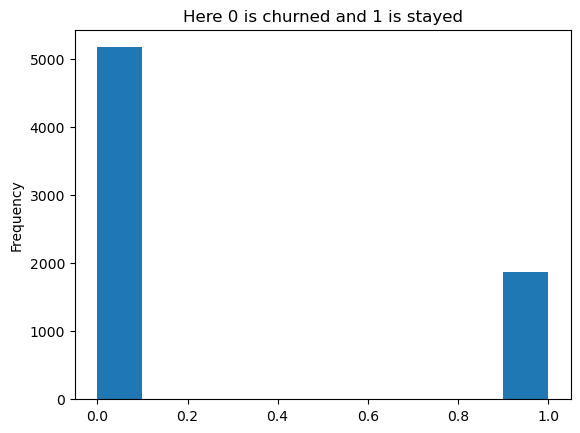

In [16]:
import matplotlib.pyplot as plt

plt.title("Here 0 is churned and 1 is stayed")
df["Churn"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

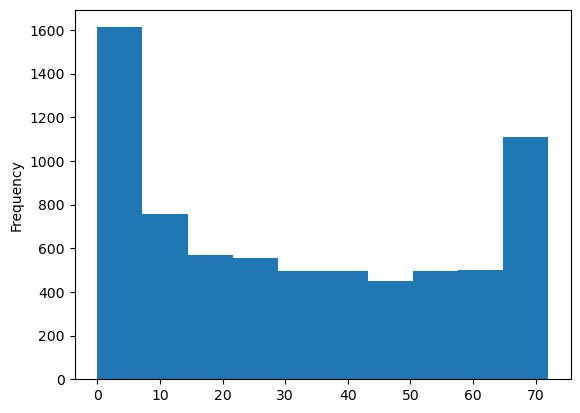

In [17]:
df["Tenure"].plot(kind='hist')

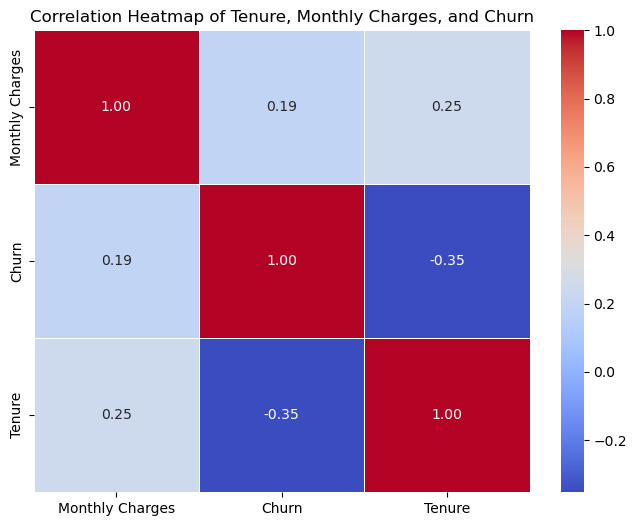

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Monthly Charges', 'Churn', 'Tenure']].corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#blue represent nehative annd red in positive

plt.title('Correlation Heatmap of Tenure, Monthly Charges, and Churn')
plt.show()

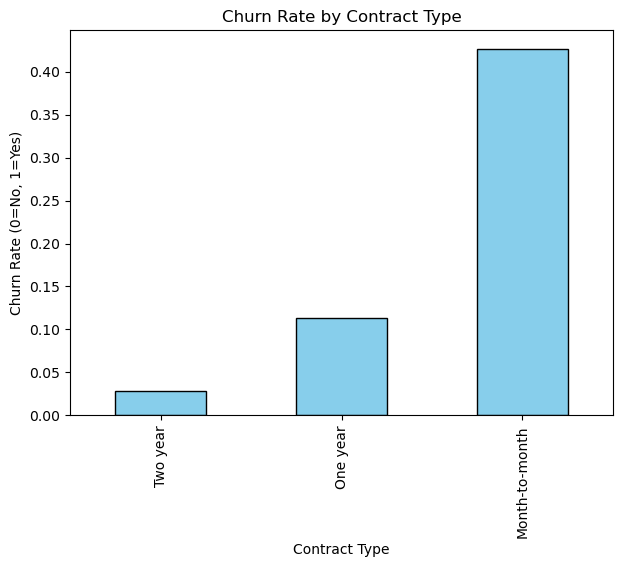

In [19]:
contract_churn= df.groupby("Contract")["Churn"].mean().sort_values()
plt.figure(figsize=(7,5))
contract_churn.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (0=No, 1=Yes)")
plt.xlabel("Contract Type")
plt.show()

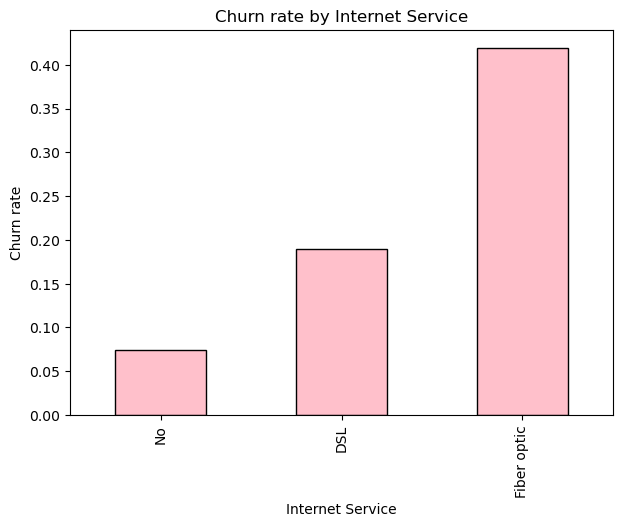

In [22]:
internet_churn=df.groupby("Internet Service")["Churn"].mean().sort_values()
plt.figure(figsize=(7,5))
internet_churn.plot(kind="bar", color="pink", edgecolor="black")
plt.title("Churn rate by Internet Service")
plt.ylabel("Churn rate")
plt.xlabel("Internet Service")
plt.show()

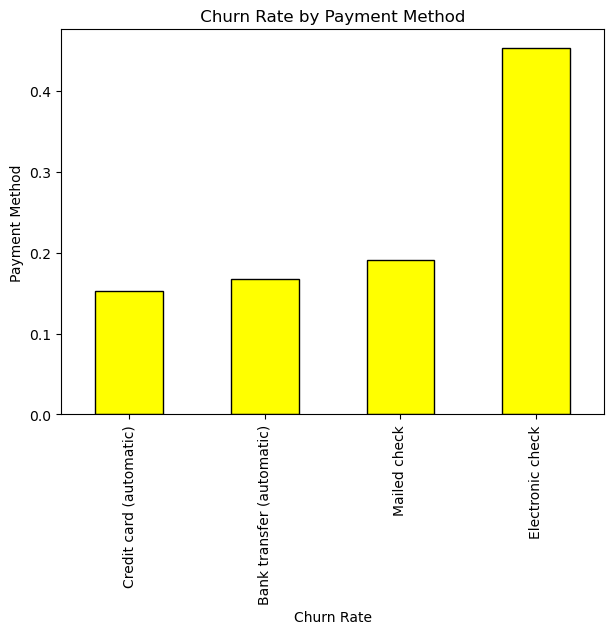

In [23]:
payment_method=df.groupby("Payment Method")["Churn"].mean().sort_values()
plt.figure(figsize=(7,5))
payment_method.plot(kind="bar", color="yellow", edgecolor="black")
plt.title(" Churn Rate by Payment Method ")
plt.xlabel("Churn Rate")
plt.ylabel("Payment Method")
plt.show()

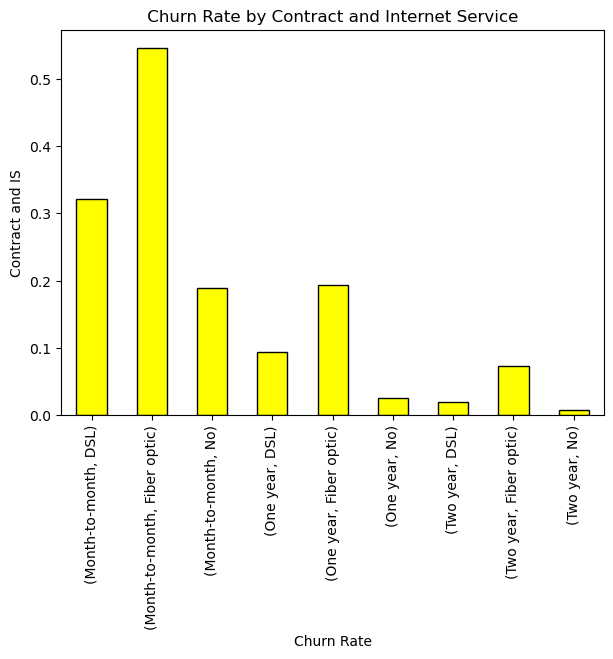

In [24]:
aggregate_method=df.groupby(["Contract","Internet Service"])["Churn"].mean()
plt.figure(figsize=(7,5))
aggregate_method.plot(kind="bar", color="yellow", edgecolor="black")
plt.title(" Churn Rate by Contract and Internet Service ")
plt.xlabel("Churn Rate")
plt.ylabel("Contract and IS")
plt.show()

C:\Users\PRACHI\AppData\Local\Temp\ipykernel_5876\3265276239.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregate_method2=df.groupby(["Contract","TenureGroup"])["Churn"].mean()


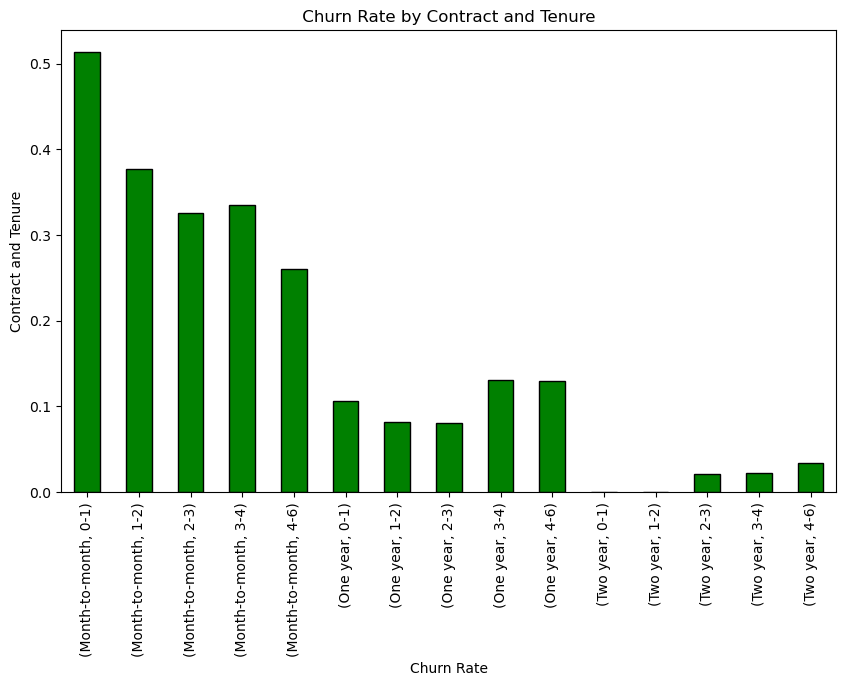

In [25]:
bins=[0,12,24,36,48,72]
labels=["0-1","1-2","2-3","3-4","4-6"]
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=True)

aggregate_method2=df.groupby(["Contract","TenureGroup"])["Churn"].mean()
plt.figure(figsize=(10,6))
aggregate_method2.plot(kind="bar", color="green", edgecolor="black")
plt.title(" Churn Rate by Contract and Tenure ")
plt.xlabel("Churn Rate")
plt.ylabel("Contract and Tenure")
#plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
dropp= df.drop(['Customer ID', 'LoyaltyID'], axis=1)
print(dropp)

     Senior Citizen Partner Dependents  Tenure Phone Service  \
0                No     Yes         No       1            No   
1                No      No         No      34           Yes   
2                No      No         No       2           Yes   
3                No      No         No      45            No   
4                No      No         No       2           Yes   
...             ...     ...        ...     ...           ...   
7038             No     Yes        Yes      24           Yes   
7039             No     Yes        Yes      72           Yes   
7040             No     Yes        Yes      11            No   
7041            Yes     Yes         No       4           Yes   
7042             No      No         No      66           Yes   

        Multiple Lines Internet Service Online Security Online Backup  \
0     No phone service              DSL              No           Yes   
1                   No              DSL             Yes            No   
2           

In [27]:
df_encoded = pd.get_dummies(dropp, drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn", axis=1)   # features
y = df_encoded["Churn"]                # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
print(df_encoded.head())        # first 5 rows
print(df_encoded.shape)         # rows and columns

   Tenure  Monthly Charges  Churn  Senior Citizen_Yes  Partner_Yes  \
0       1            29.85      0               False         True   
1      34            56.95      0               False        False   
2       2            53.85      1               False        False   
3      45            42.30      0               False        False   
4       2            70.70      1               False        False   

   Dependents_Yes  Phone Service_Yes  Multiple Lines_No phone service  \
0           False              False                             True   
1           False               True                            False   
2           False               True                            False   
3           False              False                             True   
4           False               True                            False   

   Multiple Lines_Yes  Internet Service_Fiber optic  ...  \
0               False                         False  ...   
1               Fals

In [30]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Tenure"] = pd.to_numeric(df["Tenure"], errors="coerce")
print(df["Total Charges"])
print(df["Tenure"])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: Tenure, Length: 7043, dtype: int64


In [31]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(categorical_cols)
print(df_encoded)

Index(['Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'TenureGroup'],
      dtype='object')
      LoyaltyID  Tenure  Monthly Charges  Total Charges  Churn  \
0        318537       1            29.85          29.85      0   
1        152148      34            56.95        1889.50      0   
2        326527       2            53.85         108.15      1   
3        845894      45            42.30        1840.75      0   
4        503388       2            70.70         151.65      1   
...         ...     ...              ...            ...    ...   
7038     810338      24            84.80        1990.50      0   
7039     230811      72           103.20        7362.90      0   
7040     155157      11            29.60         346.45     

In [32]:
df = df.drop(columns=["Customer ID", "LoyaltyID"], errors="ignore")
print(df)

     Senior Citizen Partner Dependents  Tenure Phone Service  \
0                No     Yes         No       1            No   
1                No      No         No      34           Yes   
2                No      No         No       2           Yes   
3                No      No         No      45            No   
4                No      No         No       2           Yes   
...             ...     ...        ...     ...           ...   
7038             No     Yes        Yes      24           Yes   
7039             No     Yes        Yes      72           Yes   
7040             No     Yes        Yes      11            No   
7041            Yes     Yes         No       4           Yes   
7042             No      No         No      66           Yes   

        Multiple Lines Internet Service Online Security Online Backup  \
0     No phone service              DSL              No           Yes   
1                   No              DSL             Yes            No   
2           

In [33]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
print(df["Total Charges"])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64


In [34]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Categorical:", list(categorical_cols))
print("Numeric:", list(numeric_cols))


Categorical: ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'TenureGroup']
Numeric: ['Tenure', 'Monthly Charges', 'Total Charges', 'Churn']


In [35]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [37]:
print(df_encoded.shape)
print(df_encoded.head())


(7043, 34)
   Tenure  Monthly Charges  Total Charges  Churn  Senior Citizen_Yes  \
0       1            29.85          29.85      0               False   
1      34            56.95        1889.50      0               False   
2       2            53.85         108.15      1               False   
3      45            42.30        1840.75      0               False   
4       2            70.70         151.65      1               False   

   Partner_Yes  Dependents_Yes  Phone Service_Yes  \
0         True           False              False   
1        False           False               True   
2        False           False               True   
3        False           False              False   
4        False           False               True   

   Multiple Lines_No phone service  Multiple Lines_Yes  ...  \
0                             True               False  ...   
1                            False               False  ...   
2                            False              

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   # <- fixed

X = df_encoded.drop("Churn", axis=1)
#X = X.astype(int)

y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

# 5. Predict on test set
y_pred = model.predict(X_test)

# 6. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(model)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [53]:
import numpy as np

# Check NaN
print(df.isna().sum())

# Check infinite values
print(np.isinf(df).sum())

# Check any remaining
print(np.isnan(df).sum())

# Show rows with problems
problem_rows = df[df.isna().any(axis=1) | np.isinf(df).any(axis=1)]
print(problem_rows.head())



Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
TenureGroup          11
dtype: int64


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Drop rows with missing Total Charges or TenureGroup
df = df.dropna(subset=["Total Charges", "TenureGroup"]).reset_index(drop=True)

print(df.isnull().sum())  # should now all be 0


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Drop bad rows first (you already did this)
df = df.dropna(subset=["Total Charges", "TenureGroup"]).reset_index(drop=True)

# 2. One-hot encode categoricals
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# (Optional but safer) Ensure numeric type
X = X.astype(int)
y = y.astype(int)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7924662402274343

Confusion Matrix:
 [[920 113]
 [179 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred=  rf_model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification using Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy 0.7846481876332623
Classification using Confusion Matrix:
 [[921 112]
 [191 183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.05,     # step size shrinkage
    max_depth=6,            # tree depth
    subsample=0.8,          # sample ratio of training data
    colsample_bytree=0.8,   # sample ratio of features
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost Accuracy: 0.7860696517412935
Confusion Matrix:
 [[913 120]
 [181 193]]


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# --- Train Models ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probs for ROC-AUC
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PRACHI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:40:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.788913   0.635088  0.483957  0.549317  0.831694
1        Random Forest  0.788202   0.637681  0.470588  0.541538  0.818753
2              XGBoost  0.786070   0.616613  0.516043  0.561863  0.829089


In [66]:
import joblib
joblib.dump(xgb_model, "churn_model.pkl")   # save your best model


['churn_model.pkl']

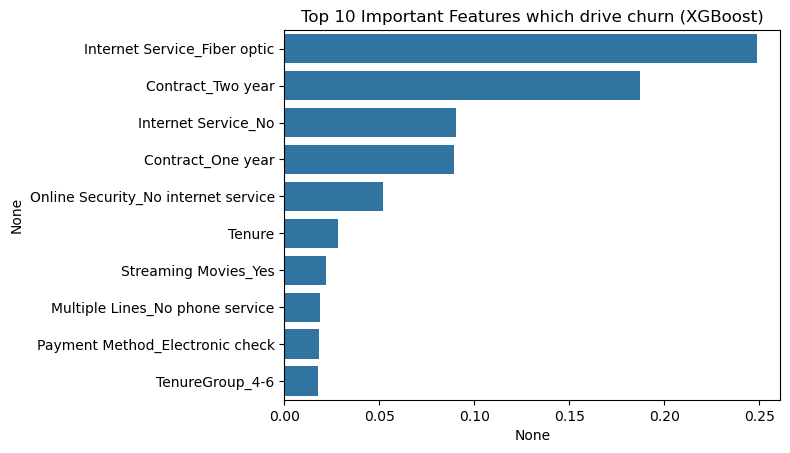

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 10 Important Features which drive churn (XGBoost)")
plt.show()


In [70]:
print(list(X.columns))

['Tenure', 'Monthly Charges', 'Total Charges', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes', 'Multiple Lines_No phone service', 'Multiple Lines_Yes', 'Internet Service_Fiber optic', 'Internet Service_No', 'Online Security_No internet service', 'Online Security_Yes', 'Online Backup_No internet service', 'Online Backup_Yes', 'Device Protection_No internet service', 'Device Protection_Yes', 'Tech Support_No internet service', 'Tech Support_Yes', 'Streaming TV_No internet service', 'Streaming TV_Yes', 'Streaming Movies_No internet service', 'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check', 'TenureGroup_1-2', 'TenureGroup_2-3', 'TenureGroup_3-4', 'TenureGroup_4-6']


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from werkzeug.serving import run_simple

app = Flask(__name__)
model = joblib.load("churn_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    features = np.array(data["features"]).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"Churn Prediction": int(prediction)})

if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)



In [ ]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [1, 0, 34, 1, 0, 56, 1, 0, 1, 0]}  # <-- replace with real customer features
response = requests.post(url, json=data)
print(response.json())


In [ ]:
import joblib

# 1) save the trained model
joblib.dump(model, "churn_model.pkl")   # model is the trained estimator object

# 2) save the feature order (X.columns must be from your training pipeline)
joblib.dump(list(X.columns), "model_columns.pkl")


In [ ]:
import requests

url = "http://127.0.0.1:5000/predict"
payload = {
    "feature_dict": {
        "Tenure": 34,
        "Monthly Charges": 56.95,
        "Total Charges": 1889.5,
        "Contract_One year": 1,
        "Contract_Two year": 0
    }
}
resp = requests.post(url, json=payload)
print(resp.status_code, resp.json())
